In [21]:
import sys 
sys.path.append('/Users/lei/home/studyhall/modeling-rsa/lib') 
  
import pickle 
import pandas as pd
from tqdm import tqdm 

import torch 
 
from ffnn import FFNN 
from utils import * 
from plots import * 
from qvalue_machine import * 
 

In [22]:
net = FFNN('cpu')
net.load_state_dict(torch.load('../models/ffnn_30_001_checkpoint.pt')) 
net = net.float() 

In [23]:
corpus = load("/Users/lei/home/studyhall/modeling-rsa/dns_29_periodic_hills_dataset/alph05-4071-2024.dat")
print(np.shape(corpus)) 
print(len(columns)) 

(98688, 15)
15


In [24]:
# qvm = Qvalue_Machine(df)
# data = [[df.iloc[i]['x'], df.iloc[i]['y'], qvm.q1(i), qvm.q4(i), qvm.q6(i), qvm.q7(i), qvm.q10(i)] for i in tqdm(df.index)]  
# columns = ['x', 'y', 'q1', 'q4', 'q6', 'q7', 'q10'] 

In [25]:
# qvalue_df = pd.DataFrame(data, columns=columns) 
# qvalue_df 

In [26]:
# with open('foo.pkl', 'wb') as f:
#     pickle.dump(qvalue_df, f)

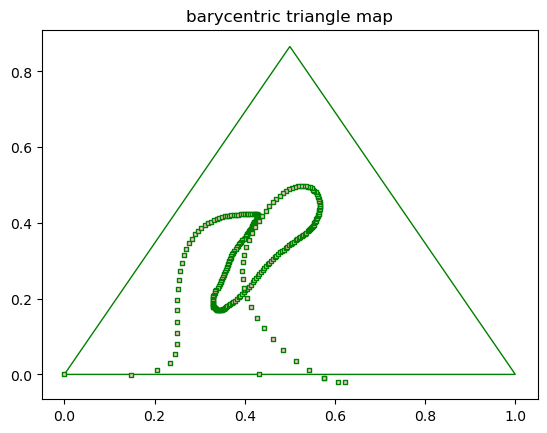

0

In [27]:
plot_barcentric(corpus, 2)

[0. 0. 0.]
[ 0.00944613 -0.01395226  0.00119603]
----------------
[ 0.14936061  0.84305892 -0.00109443]
[0.2566376 0.2541212 0.3509319]
----------------
[0.19805607 0.76348456 0.0148921 ]
[0.2566376 0.2541212 0.3509319]
----------------
[0.21663252 0.71213998 0.03451224]
[0.2566376 0.2541212 0.3509319]
----------------
[0.21500417 0.67681333 0.06179164]
[0.2566376 0.2541212 0.3509319]
----------------
[0.20296642 0.65096113 0.09290772]
[0.2566376 0.2541212 0.3509319]
----------------
[0.18666982 0.62892401 0.12648151]
[0.2566376 0.2541212 0.3509319]
----------------
[0.16927179 0.60842987 0.1609506 ]
[0.2566376 0.2541212 0.3509319]
----------------
[0.15222631 0.58867439 0.19517967]
[0.2566376 0.2541212 0.3509319]
----------------
[0.1361915  0.56954755 0.22831239]
[0.2566376 0.2541212 0.3509319]
----------------


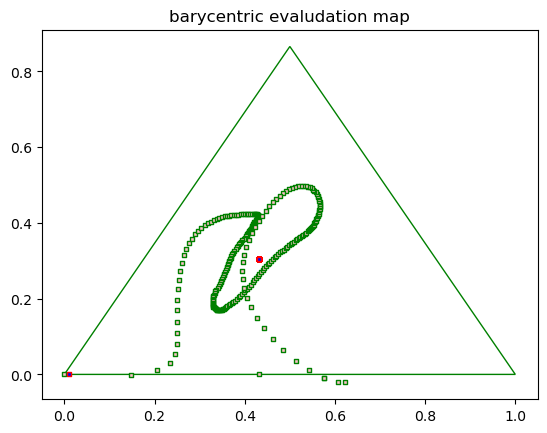

0

In [28]:
evaluate_ffnn(corpus=corpus, x=2, model=net, ms=['s', 's'], cs=['pink', 'blue'], edgecolors=['green', 'red'])

In [19]:
with open('../models/rf.pkl', 'rb') as f:
    rf = pickle.load(f)

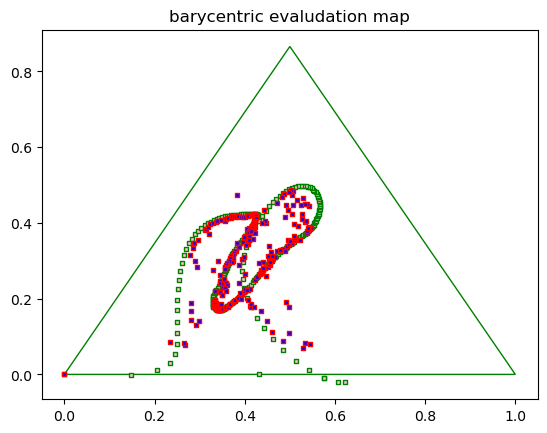

0

In [ ]:
evaluate_rf(corpus=corpus, x=2, model=rf, ms=['s', 's'], cs=['pink', 'blue'], edgecolors=['green', 'red'])